In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the file
cars = pd.read_csv("Car details.csv")
cars.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [3]:
# Checking the shape of dataset
cars.shape

(8128, 13)

In [4]:
# Checking the null value
cars.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
# Dropping the null values
cars = cars.dropna(how = 'any')
cars.shape

(7906, 13)

In [6]:
# Importing regular expression library
import re

In [7]:
# Cleaning the torque value
res = '190Nm@ 2,000rpm'.replace(".", "")
res = res.replace(",", "")
a = [int(s) for s in re.findall(r'\d+', res)]
a

[190, 2000]

In [8]:
# Extracting only rpm value from torque column
torque_list = cars['torque']
torque_rpm = []

def extractingRPM(x):
    for item in x:
        res = item.replace(".", "")
        res = res.replace(",", "")
        temp = [int(s) for s in re.findall(r'\d+', res)]
        torque_rpm.append(max(temp))

extractingRPM(torque_list)
print(torque_list[:2])
print(torque_rpm[:2])

0         190Nm@ 2000rpm
1    250Nm@ 1500-2500rpm
Name: torque, dtype: object
[2000, 2500]


In [9]:
# Creating new column as torque_rpm
cars['torque_rpm'] = torque_rpm
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500


In [10]:
# Cleaning the mileage column
mil_list = cars['mileage']
mil_kmpl = []

def extractingmil(x):
    for item in x:
        temp = []
        try:
            for s in item.split(" "):
                temp.append(float(s))
        except:
            pass
        mil_kmpl.append(max(temp))

extractingmil(mil_list)
print(mil_list[:2])
print(mil_kmpl[:2])

0     23.4 kmpl
1    21.14 kmpl
Name: mileage, dtype: object
[23.4, 21.14]


In [11]:
# Creating the new column as mil_kmpl
cars['mil_kmpl'] = mil_kmpl
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14


In [12]:
# Cleaning the engine column
engine_list = cars['engine']
engine_cc = []

def extractingEngine(x):
    for item in x:
        temp = []
        try:
            for s in item.split(" "):
                temp.append(float(s))
        except:
            pass
        engine_cc.append(max(temp))

extractingEngine(engine_list)
print(engine_list[:2])
print(engine_cc[:2])

0    1248 CC
1    1498 CC
Name: engine, dtype: object
[1248.0, 1498.0]


In [13]:
# Creating new column as engine_cc
cars['engine_cc'] = engine_cc
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0


In [14]:
# Cleaning the max_power column
power_list = cars['max_power']
max_power = []

def extractingPower(x):
    for item in x:
        temp = []
        try:
            for s in item.split(" "):
                temp.append(float(s))
        except:
            pass
        max_power.append(max(temp))

extractingPower(power_list)
print(power_list[:2])
print(max_power[:2])

0        74 bhp
1    103.52 bhp
Name: max_power, dtype: object
[74.0, 103.52]


In [15]:
# Creating new column as max_power
cars['max_power_new'] = max_power
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0,103.52


In [16]:
# Dropping the 'mileage', 'engine', 'max_power' and 'torque' column from original dataset
cars_new = cars.drop(['mileage', 'engine', 'max_power', 'torque'], axis = 1)

In [17]:
# Statistics of the dataset
cars_new.describe()

,year,selling_price,km_driven,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393,3474.631419,19.419861,1458.708829,91.587374
std,3.863695,8.135827e+05,5.679230e+04,0.959208,2579.612132,4.036263,503.893057,35.747216
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,400.000000,0.000000,624.000000,32.800000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000,2500.000000,16.780000,1197.000000,68.050000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,3000.000000,19.300000,1248.000000,82.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000,4000.000000,22.320000,1582.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,43639.000000,42.000000,3604.000000,400.000000


In [18]:
# Checking for categorical data.
cars_new['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [19]:
cars_new['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [20]:
cars_new['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [21]:
cars_new['owner'].value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [22]:
# Creating new column 'Current_Year' in the dataset
cars_new['Current_Year'] = 2023

In [23]:
# Glance of dataset
cars_new

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,Current_Year
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,2000,23.40,1248.0,74.00,2023
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,2500,21.14,1498.0,103.52,2023
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,2700,17.70,1497.0,78.00,2023
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,2750,23.00,1396.0,90.00,2023
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,4500,16.10,1298.0,88.20,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,5.0,4000,18.50,1197.0,82.85,2023
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,2750,16.80,1493.0,110.00,2023
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,5.0,2000,19.30,1248.0,73.90,2023
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,5.0,3000,23.57,1396.0,70.00,2023


In [24]:
# Creating new column 'No_of_years' which is the difference of 'Current_Year' and 'year'
cars_new['No_of_years'] = cars_new['Current_Year'] - cars_new['year']
cars_new

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,Current_Year,No_of_years
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,2000,23.40,1248.0,74.00,2023,9
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,2500,21.14,1498.0,103.52,2023,9
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,2700,17.70,1497.0,78.00,2023,17
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,2750,23.00,1396.0,90.00,2023,13
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,4500,16.10,1298.0,88.20,2023,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,5.0,4000,18.50,1197.0,82.85,2023,10
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,2750,16.80,1493.0,110.00,2023,16
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,5.0,2000,19.30,1248.0,73.90,2023,14
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,5.0,3000,23.57,1396.0,70.00,2023,10


In [25]:
# Dropping hte 'Curreent_Year', 'year' and 'name' column from the dataset
cars_new.drop(['Current_Year', 'year', 'name'], axis=1, inplace=True)
cars_new

,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,No_of_years
0,450000,145500,Diesel,Individual,Manual,First Owner,5.0,2000,23.40,1248.0,74.00,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,2500,21.14,1498.0,103.52,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,2700,17.70,1497.0,78.00,17
3,225000,127000,Diesel,Individual,Manual,First Owner,5.0,2750,23.00,1396.0,90.00,13
4,130000,120000,Petrol,Individual,Manual,First Owner,5.0,4500,16.10,1298.0,88.20,16
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,5.0,4000,18.50,1197.0,82.85,10
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,2750,16.80,1493.0,110.00,16
8125,382000,120000,Diesel,Individual,Manual,First Owner,5.0,2000,19.30,1248.0,73.90,14
8126,290000,25000,Diesel,Individual,Manual,First Owner,5.0,3000,23.57,1396.0,70.00,10


In [26]:
# define numerical & categorical columns
numeric_features = [feature for feature in cars_new.columns if cars_new[feature].dtype != 'O']
categorical_features = [feature for feature in cars_new.columns if cars_new[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['selling_price', 'km_driven', 'seats', 'torque_rpm', 'mil_kmpl', 'engine_cc', 'max_power_new', 'No_of_years']

We have 4 categorical features : ['fuel', 'seller_type', 'transmission', 'owner']


In [27]:
cars_new.to_csv('Car_Details.csv', index = False)

In [59]:
# Creating new columns for categorical column
X = pd.get_dummies(cars_new, drop_first=True)
X

,selling_price,km_driven,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,No_of_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,5.0,2000,23.40,1248.0,74.00,9,1,0,0,1,0,1,0,0,0,0
1,370000,120000,5.0,2500,21.14,1498.0,103.52,9,1,0,0,1,0,1,0,1,0,0
2,158000,140000,5.0,2700,17.70,1497.0,78.00,17,0,0,1,1,0,1,0,0,0,1
3,225000,127000,5.0,2750,23.00,1396.0,90.00,13,1,0,0,1,0,1,0,0,0,0
4,130000,120000,5.0,4500,16.10,1298.0,88.20,16,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,5.0,4000,18.50,1197.0,82.85,10,0,0,1,1,0,1,0,0,0,0
8124,135000,119000,5.0,2750,16.80,1493.0,110.00,16,1,0,0,1,0,1,1,0,0,0
8125,382000,120000,5.0,2000,19.30,1248.0,73.90,14,1,0,0,1,0,1,0,0,0,0
8126,290000,25000,5.0,3000,23.57,1396.0,70.00,10,1,0,0,1,0,1,0,0,0,0


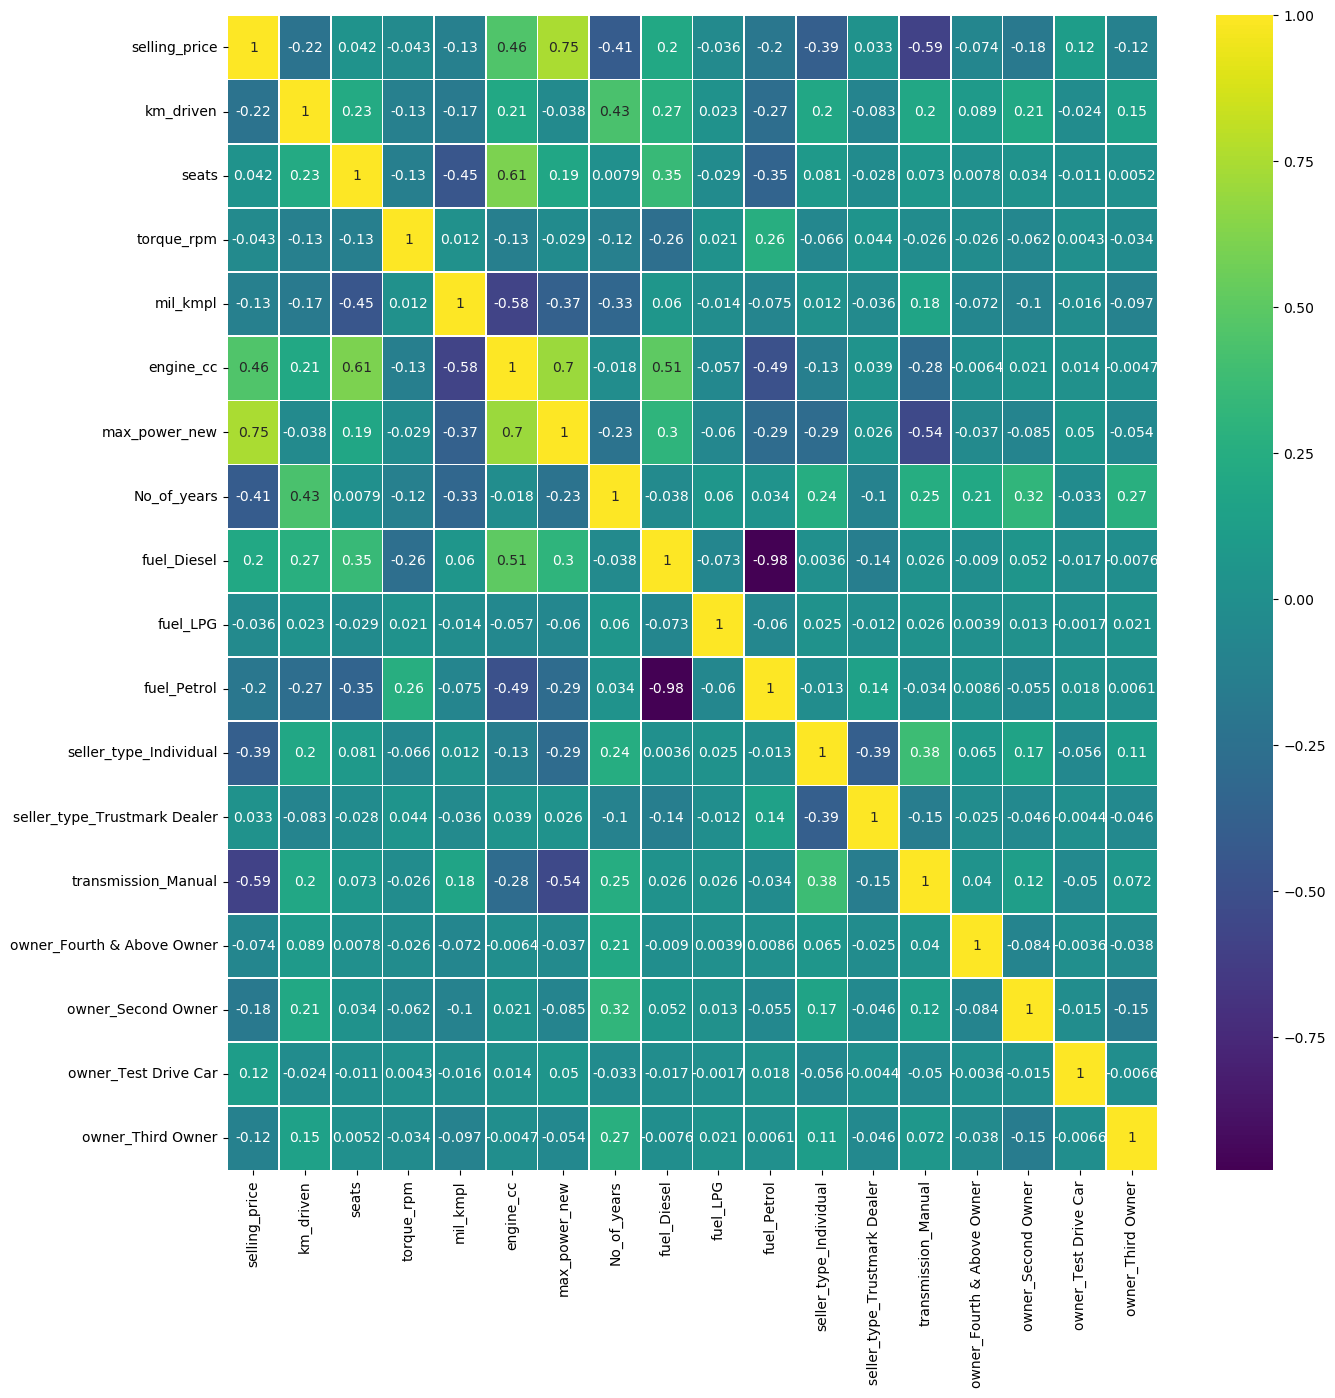

In [31]:
# Heatmap of the dataset
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,cmap='viridis',linewidths=.5)

In [61]:
y = X['selling_price']
X = X.drop(['selling_price'], axis = 1)